In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Importing Customer Churn Dataset

In [2]:
df=pd.read_csv('/content/customer_churn.csv')

In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df['Male']=pd.get_dummies(df['gender'],drop_first=True,dtype=int)

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Male'],
      dtype='object')

# Exploratory Data Anlaysis (EDA)

/tmp/ipython-input-10-234893416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
/tmp/ipython-input-10-234893416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
/tmp/ipython-input-10-234893416.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
/tmp/ipython-input-10-234893416.py:7: FutureWarning: 

Passing `palette` without assi

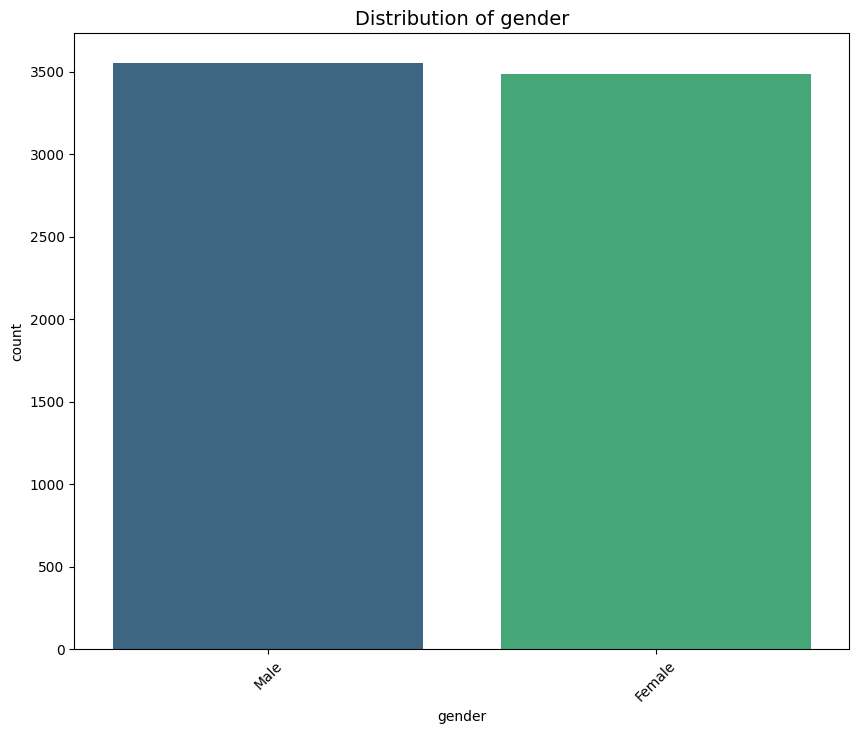

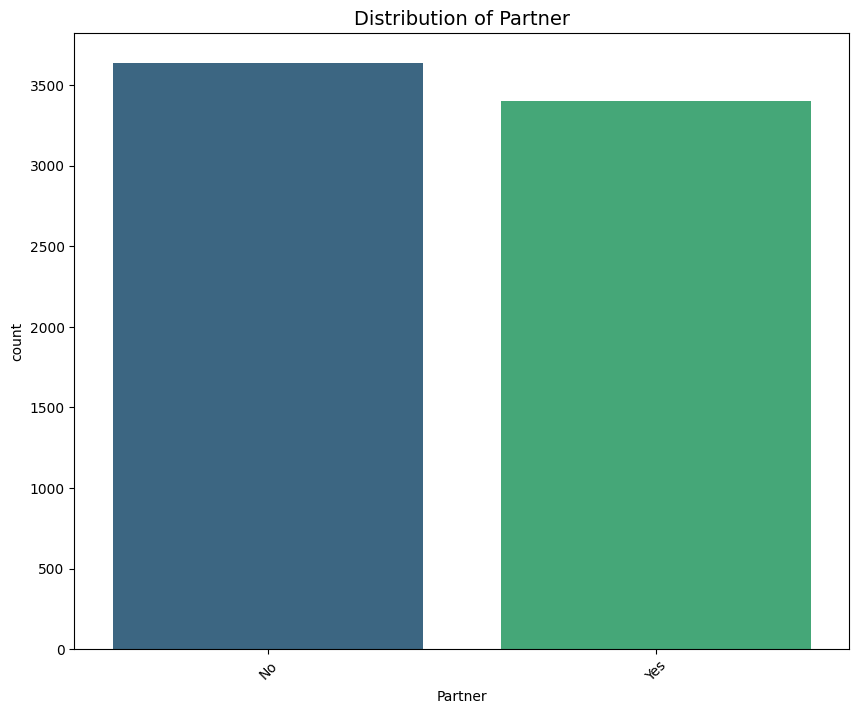

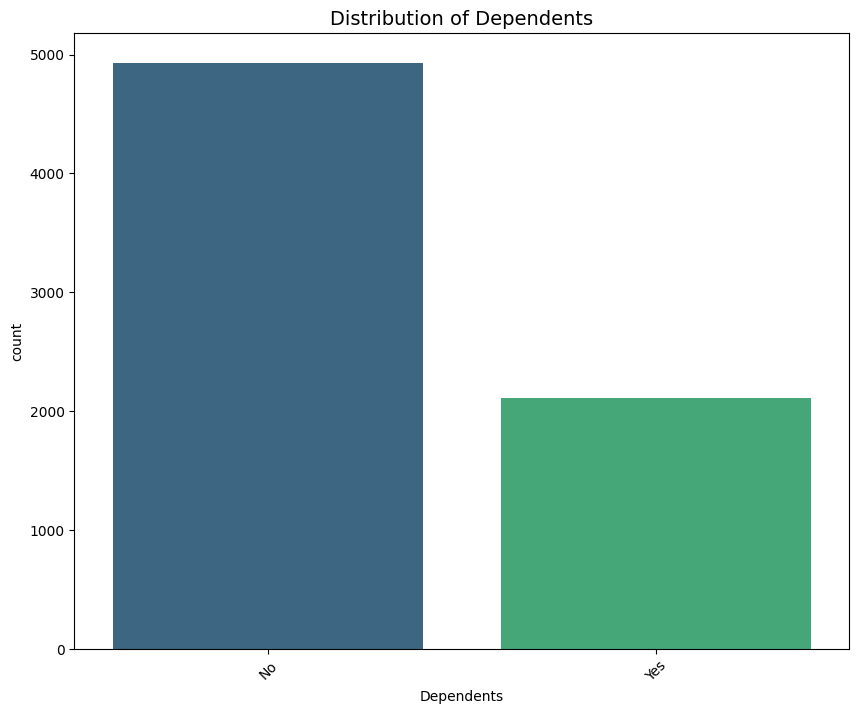

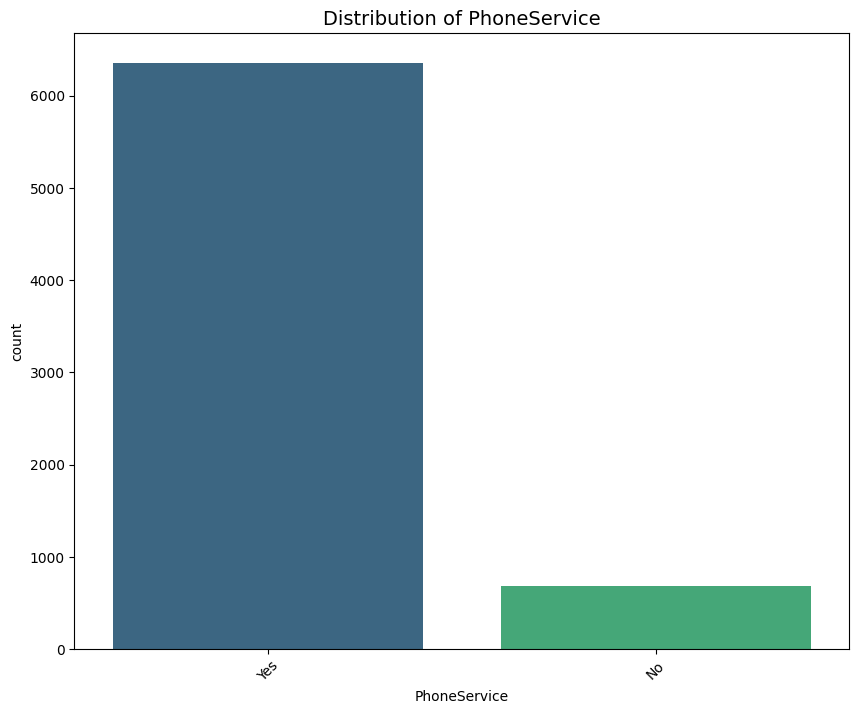

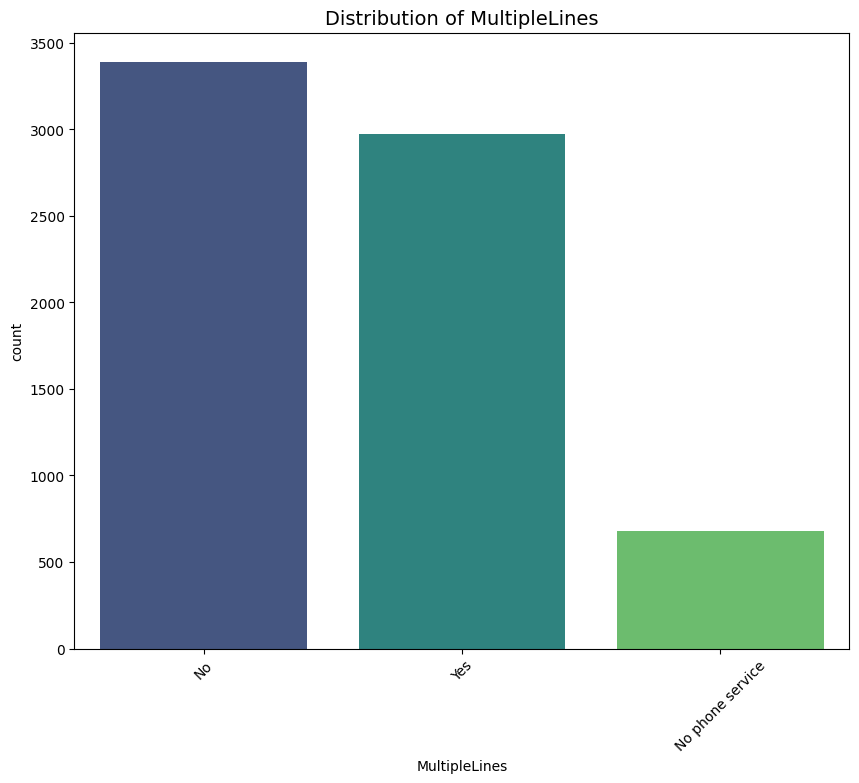

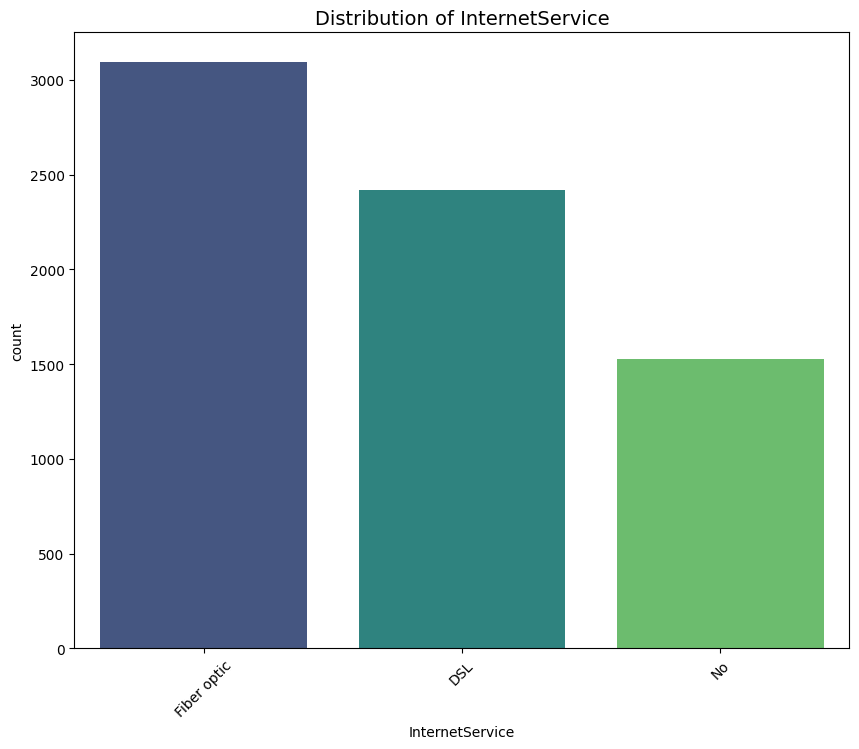

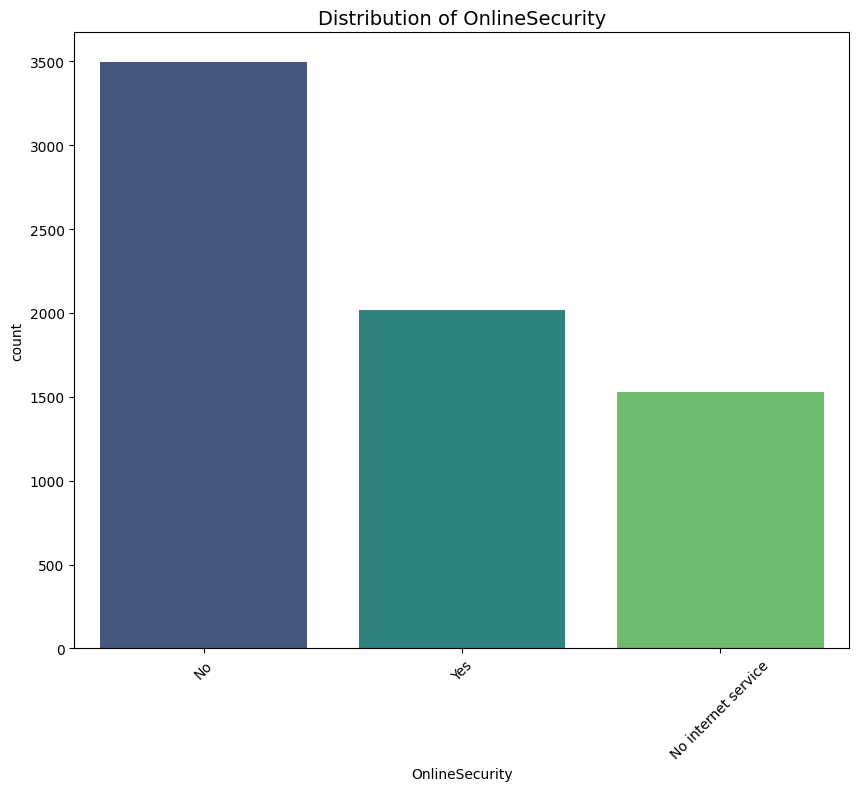

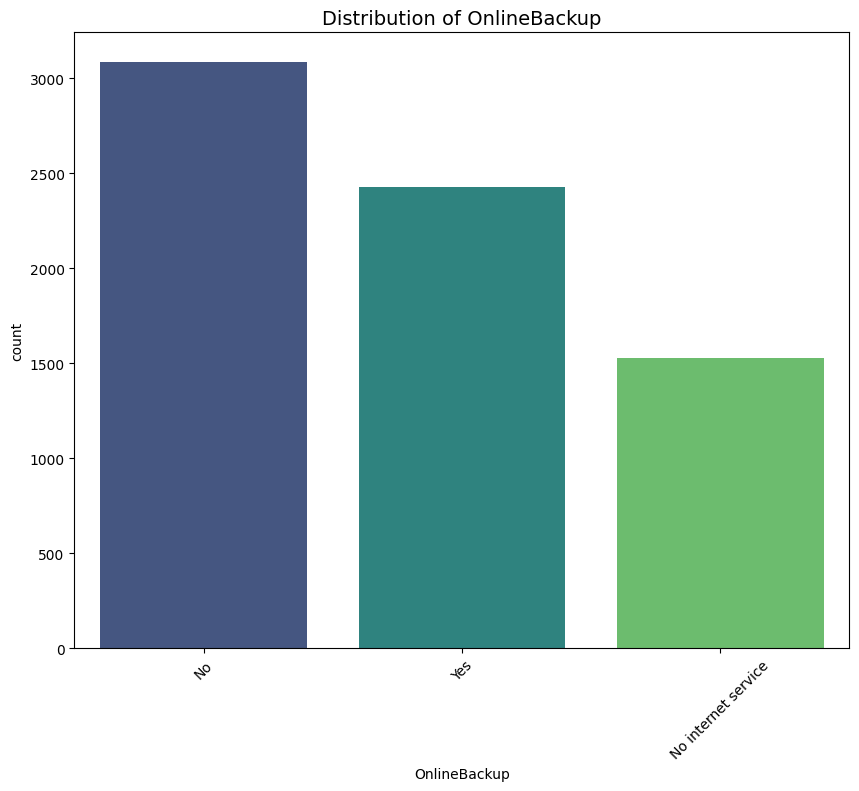

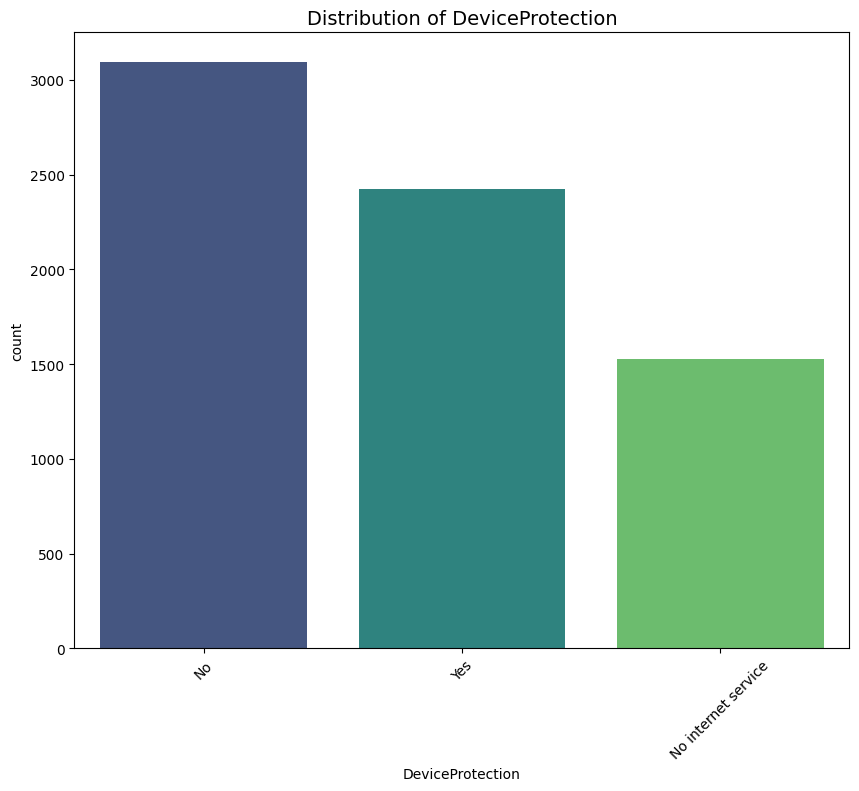

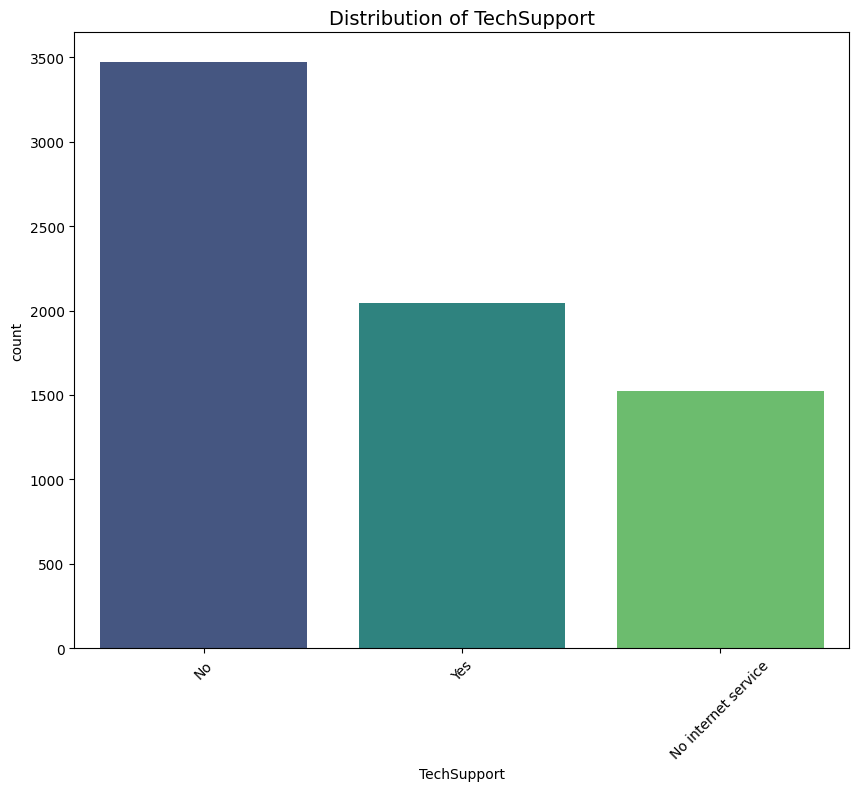

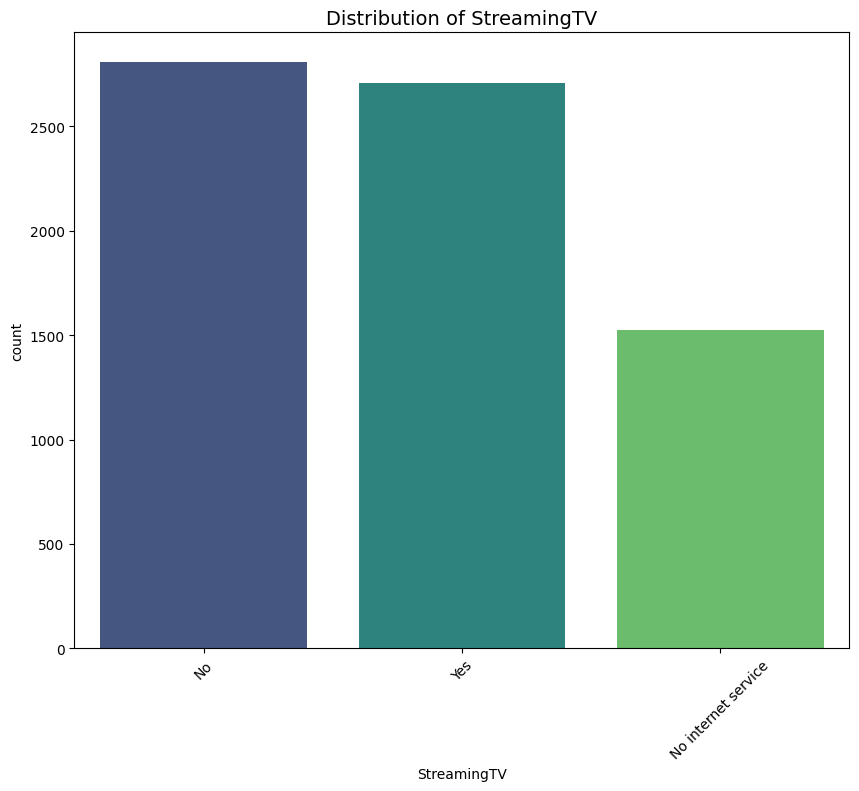

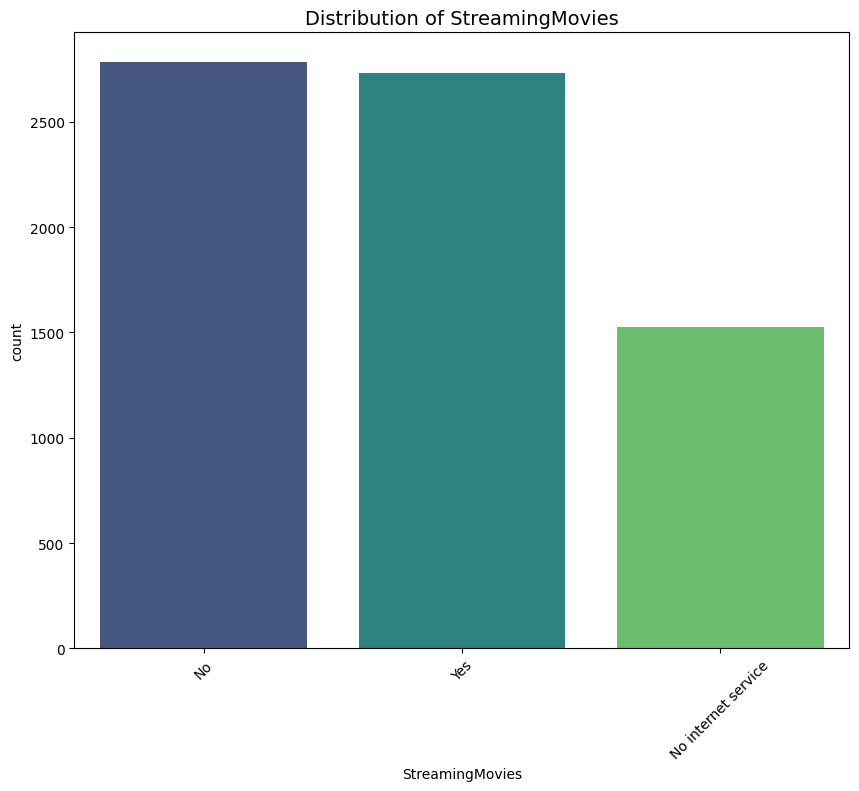

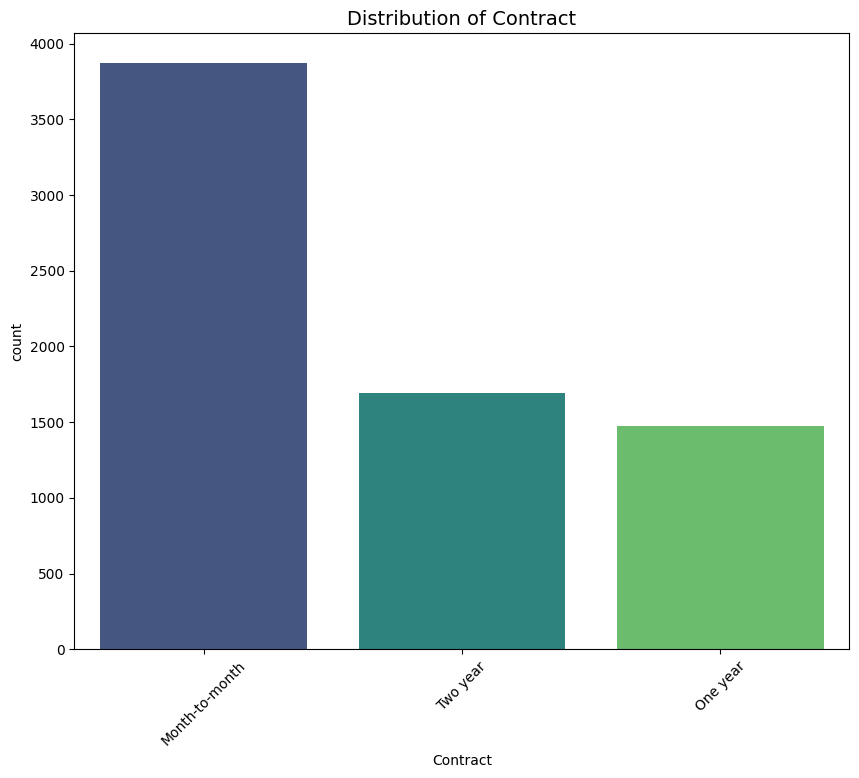

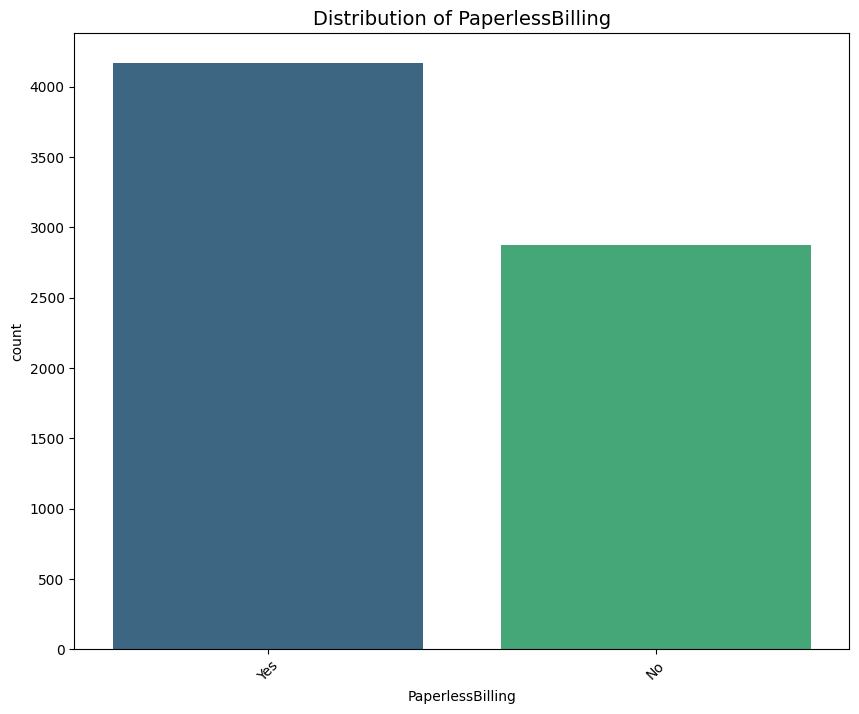

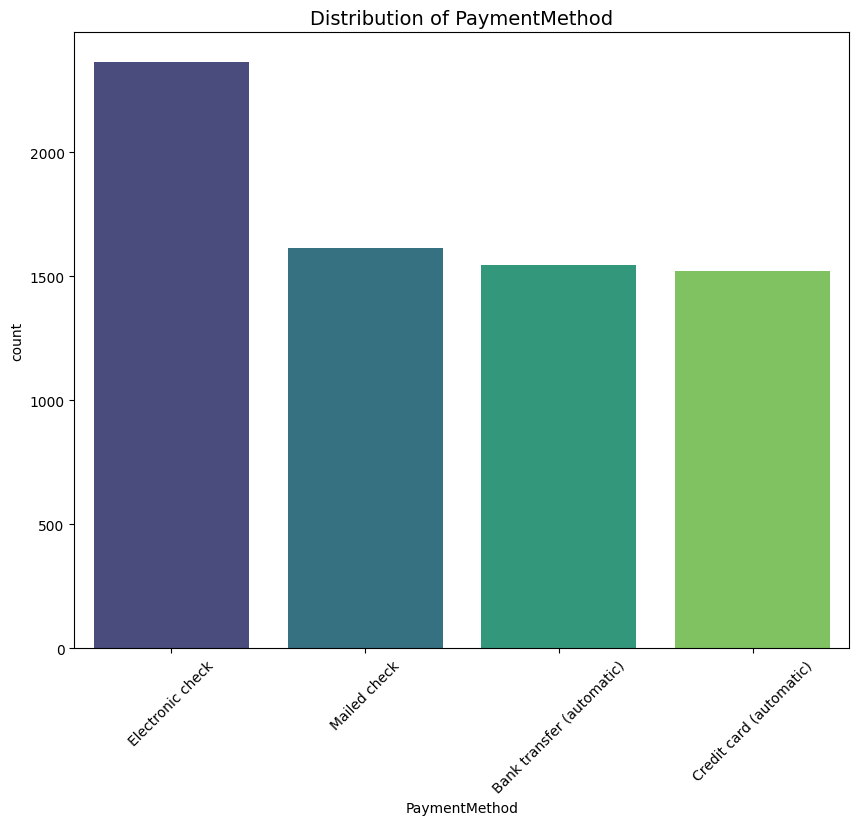

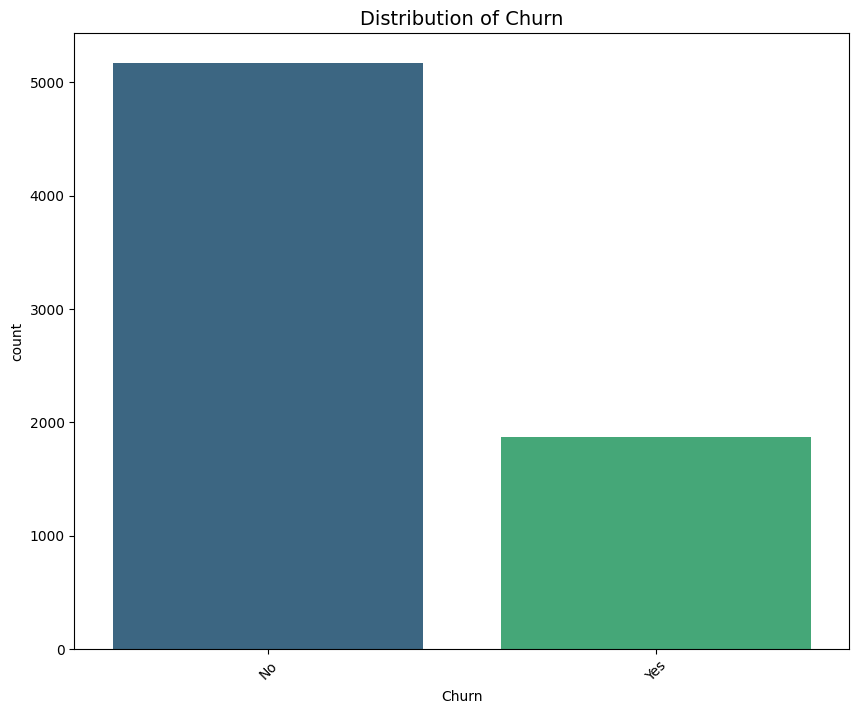

In [10]:
categorical_col=['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in categorical_col:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}',fontsize=14)
    plt.xticks(rotation=45)

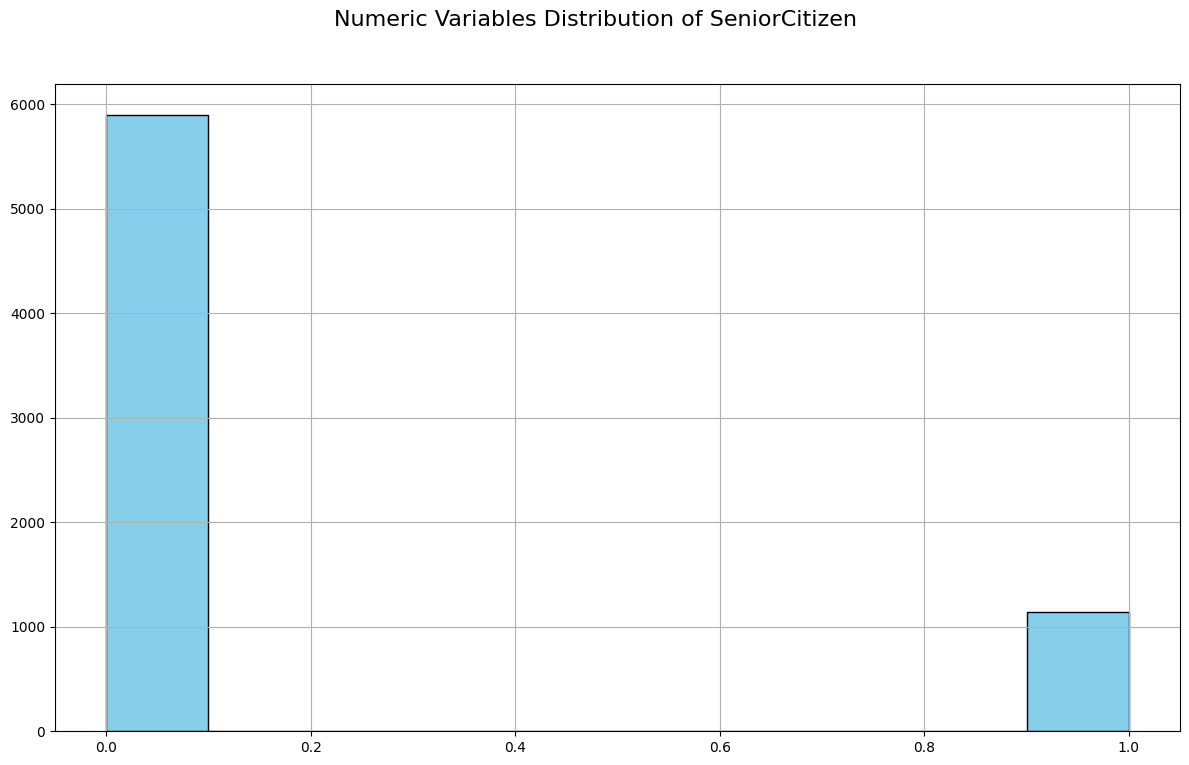

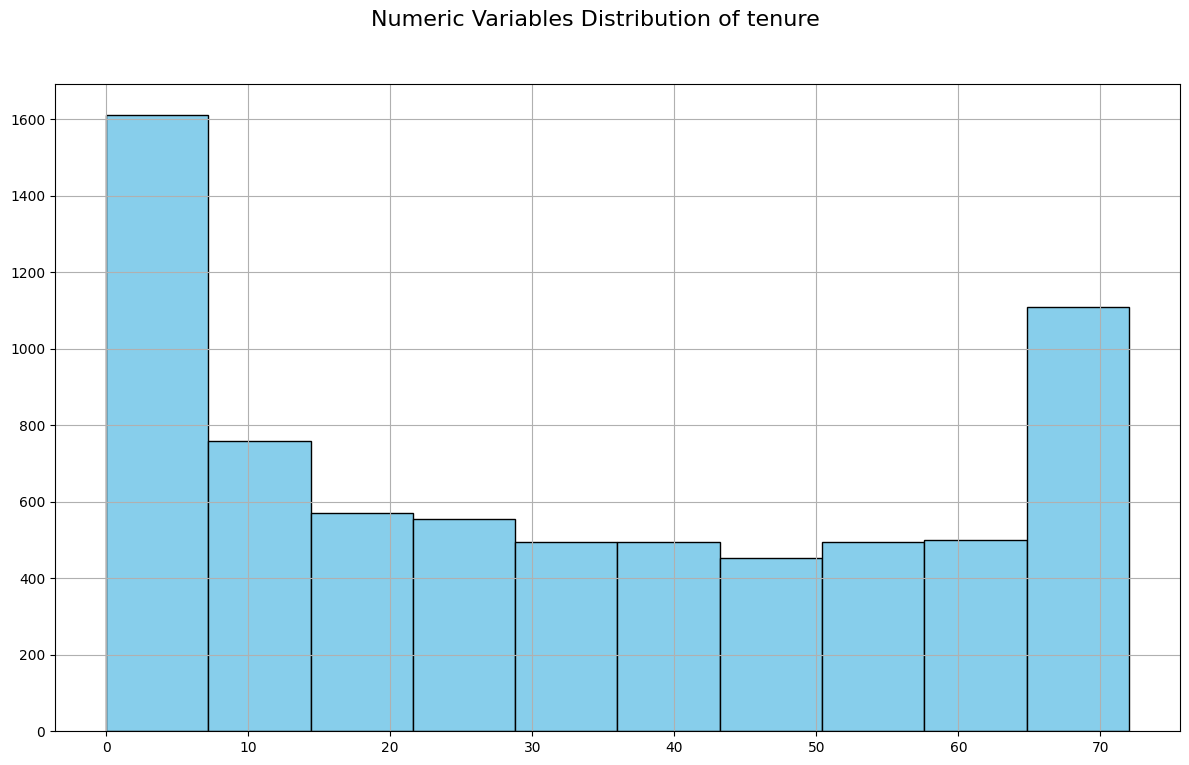

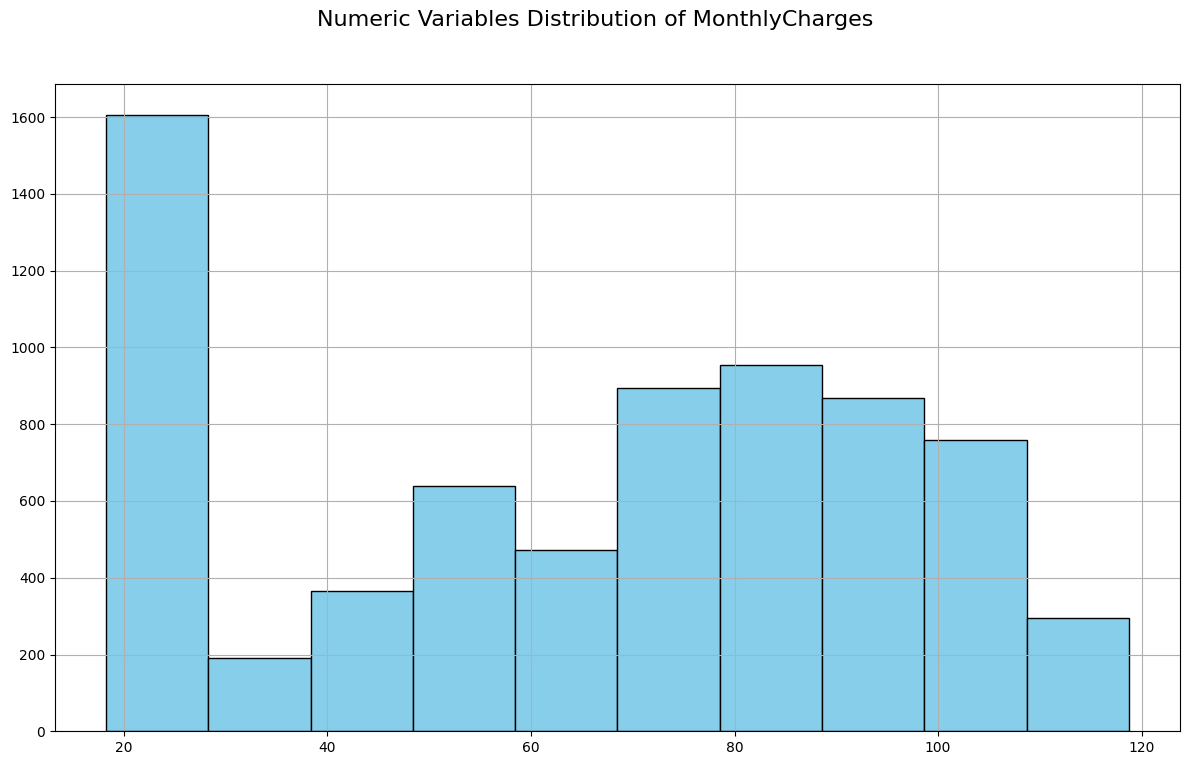

In [11]:
numerical_cols=['SeniorCitizen','tenure','MonthlyCharges']
for cols in numerical_cols:
    plt.figure(figsize=(10,8))
    df[cols].hist(figsize=(12, 8), bins=10, color='skyblue', edgecolor='black')
    plt.suptitle(f"Numeric Variables Distribution of {cols}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

/tmp/ipython-input-12-2780719842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=num_col, palette='Set2', showfliers=False)


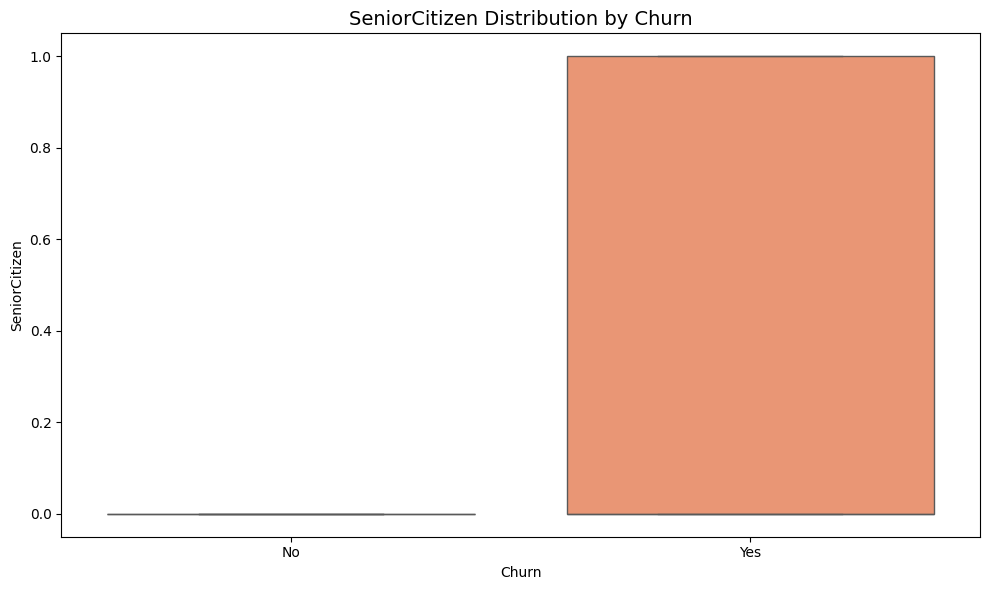

/tmp/ipython-input-12-2780719842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=num_col, palette='Set2', showfliers=False)


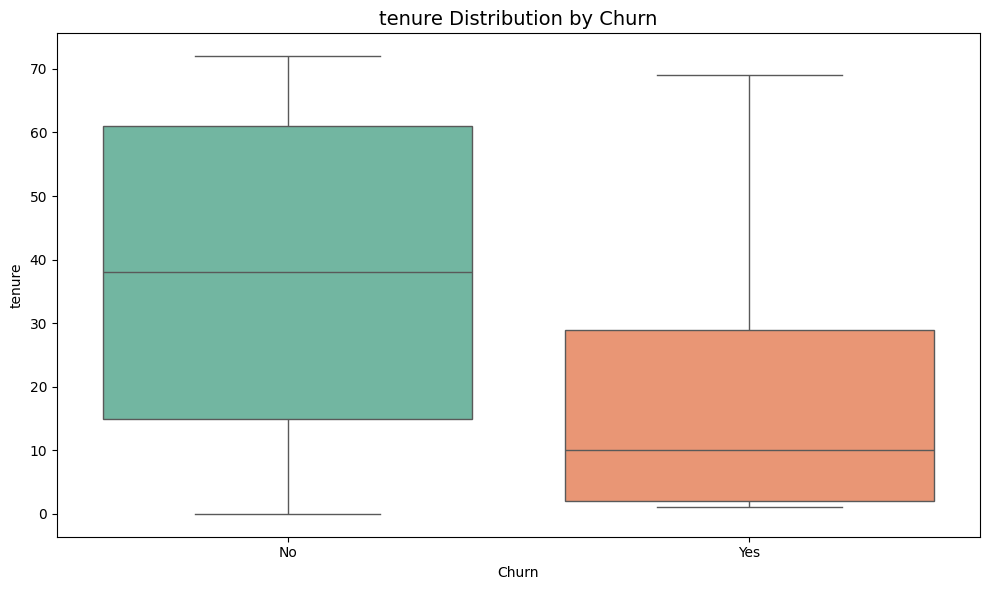

/tmp/ipython-input-12-2780719842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=num_col, palette='Set2', showfliers=False)


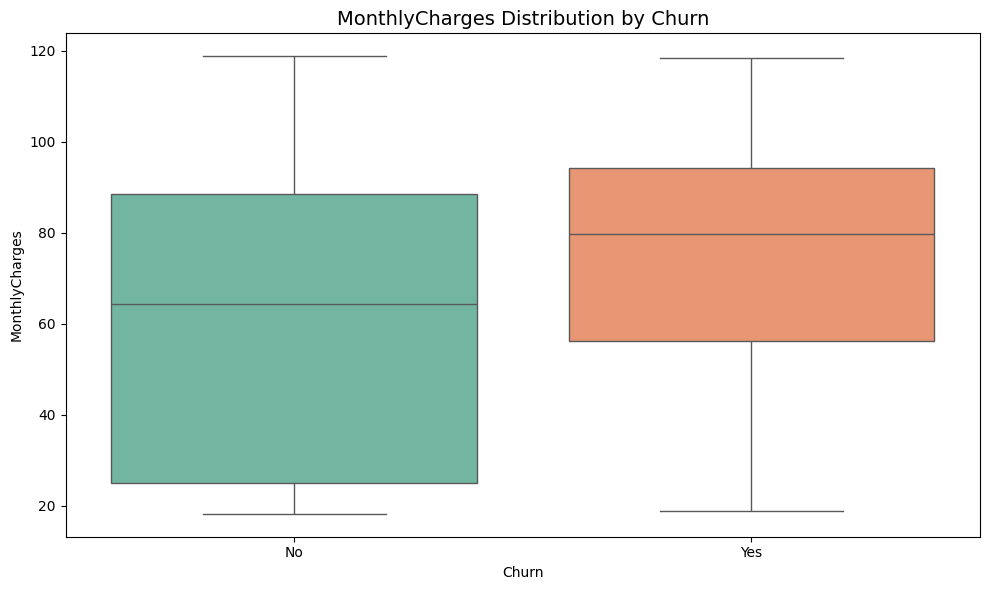

In [12]:
for num_col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Churn', y=num_col, palette='Set2', showfliers=False)
    plt.title(f"{num_col} Distribution by Churn", fontsize=14)
    plt.tight_layout()
    plt.show()

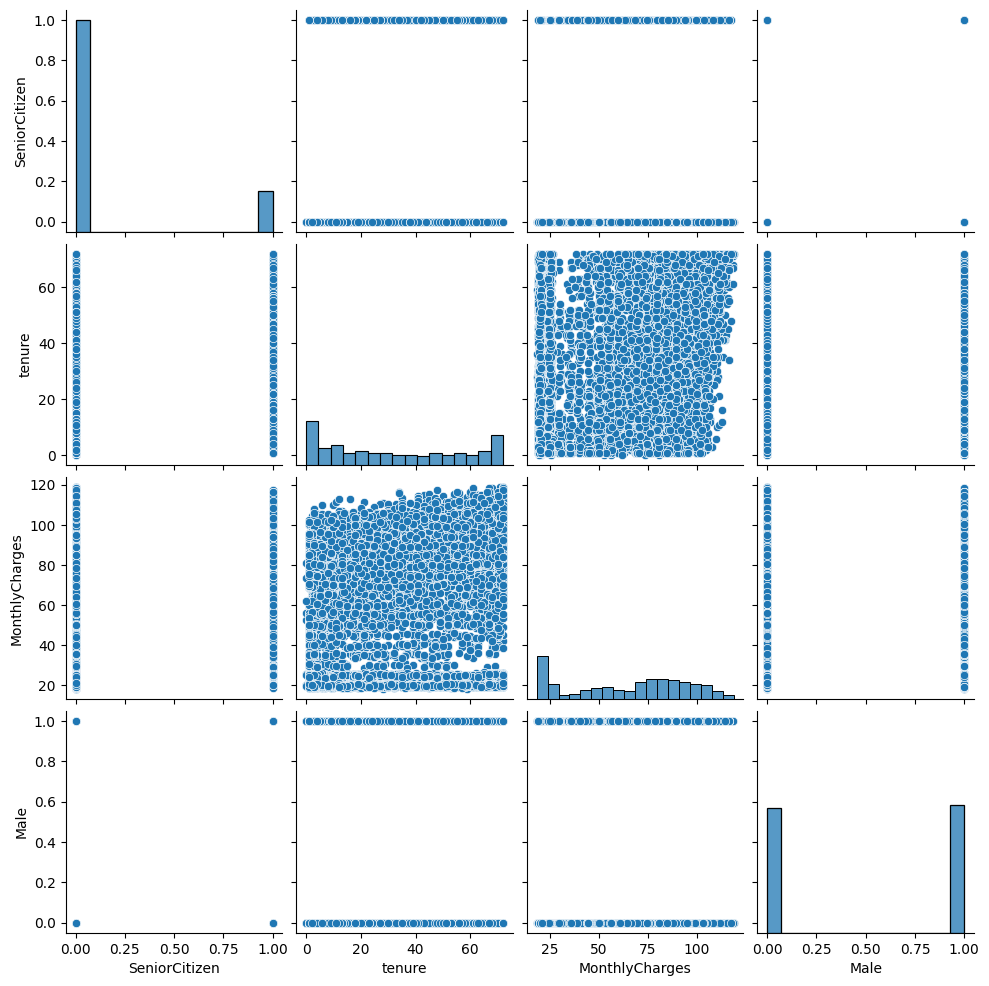

In [13]:
sns.pairplot(data=df)
plt.show()

# EDA : Correaltion Analysis

<Axes: >

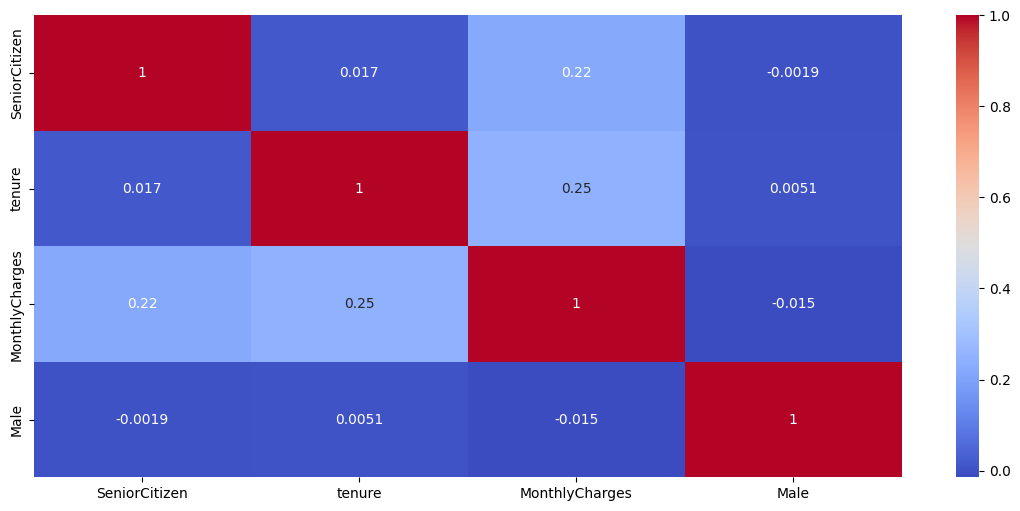

In [14]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

In [15]:
df=df.drop(columns=['customerID','gender','Partner','Dependents','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod'])

# Data Preprocessing
Data preprocessing involves preparing and cleaning data before feeding it into a machine learning model. This typically includes handling missing values, scaling/normalizing features, encoding categorical variables, and splitting the data into training and test sets. When using label encoding and one-hot encoding for ordinal data:

Label Encoding: Convert ordinal categories into numeric values that reflect the inherent order (e.g., "Low" = 1, "Medium" = 2, "High" = 3).
One-Hot Encoding: If ordinal categories are treated as nominal (no intrinsic order), create separate binary columns for each category (e.g., "Low", "Medium", "High").

In [16]:
le=LabelEncoder()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   MultipleLines     7043 non-null   object 
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   Contract          7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  Churn             7043 non-null   object 
 13  Male              7043 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 770.5+ KB


In [18]:
df=pd.get_dummies(df, columns=['MultipleLines','InternetService'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
col_obj=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Churn','PhoneService','Contract']
for col in col_obj:
    df[col]=le.fit_transform(df[col])


In [22]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# Train and test split Data

In [23]:
X=df.drop(columns=['TotalCharges','Churn'])
y=df['Churn']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

# Comparison of Machine Learning Performance

In [26]:
models={
    'Logistic Regression':LogisticRegression(max_iter=10000, random_state=42),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(n_estimators=100, random_state=42) }

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
results=[]
for name,model in models.items():
    accuracy,precision,recall,f1=evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model":name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

In [29]:
results_df=pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.794890,0.785870,0.794890,0.788517
1,KNN,0.771469,0.762399,0.771469,0.765759
2,Decision Tree,0.738112,0.736566,0.738112,0.737320
3,Random Forest,0.760114,0.746846,0.760114,0.751127



Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                 0.79489
Precision                0.78587
Recall                   0.79489
F1-Score                0.788517
Name: 0, dtype: object


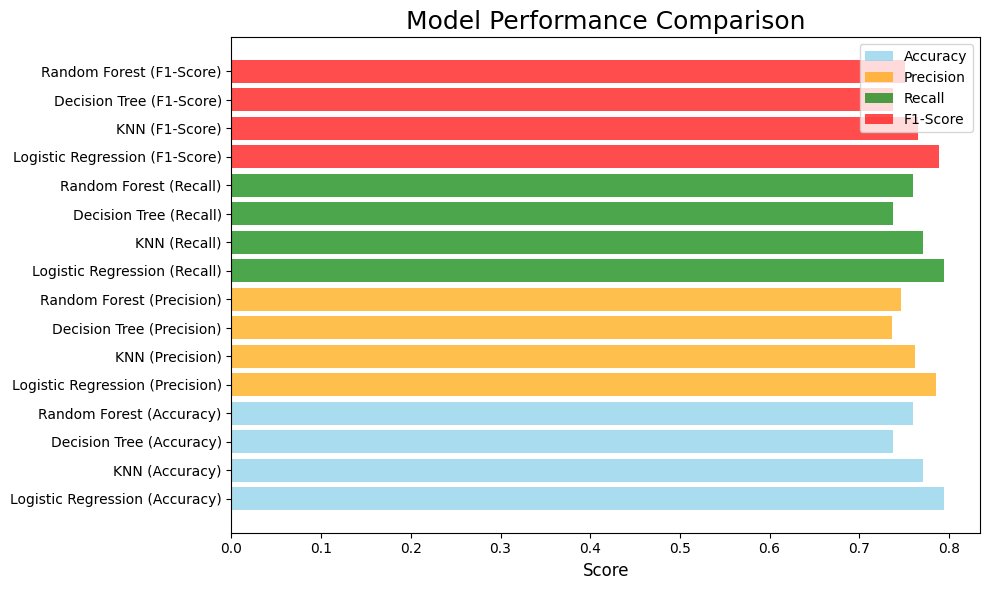


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.7949


In [30]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

# Applying Logistic Regression

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
lr_pred=lr.predict(X_test)

In [34]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1034
           1       0.64      0.53      0.58       375

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [35]:
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

# Step 4: Print the cross-validation results
print(f"Cross-validation scores for each fold: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")
print(f"Standard deviation of cross-validation scores: {scores.std()}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores for each fold: [0.80624556 0.81192335 0.78495387 0.80184659 0.80113636]
Mean cross-validation score: 0.8012211473320858
Standard deviation of cross-validation scores: 0.008997829181733159


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Positive and Negative Coefficients:
In logistic regression, positive coefficients indicate that an increase in the corresponding feature increases the likelihood of the positive class, while negative coefficients suggest that an increase in the feature decreases the probability of the positive class.

In [36]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
})

# Interpret the coefficients
print(coefficients)

                           Feature  Coefficient
0                    SeniorCitizen     0.279945
1                           tenure    -0.034756
2                     PhoneService    -0.534505
3                   OnlineSecurity    -0.280508
4                     OnlineBackup    -0.130713
5                 DeviceProtection    -0.081697
6                      TechSupport    -0.241595
7                         Contract    -0.736412
8                   MonthlyCharges     0.027142
9                             Male    -0.028620
10                MultipleLines_No    -0.373383
11  MultipleLines_No phone service     0.206426
12               MultipleLines_Yes    -0.161121
13             InternetService_DSL    -0.363984
14     InternetService_Fiber optic    -0.013270
15              InternetService_No     0.049176


# Artificial Neural Network

In [38]:
ann_model=Sequential()
ann_model.add(Dense(128,activation='relu',input_dim=X_train.shape[1]))
ann_model.add(Dense(128,activation='relu'))
ann_model.add(Dense(64,activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
ann_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
ann_model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7342 - loss: 0.5736 - val_accuracy: 0.7899 - val_loss: 0.4636
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7855 - loss: 0.4514 - val_accuracy: 0.7864 - val_loss: 0.4446
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7980 - loss: 0.4339 - val_accuracy: 0.7871 - val_loss: 0.4455
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7939 - loss: 0.4285 - val_accuracy: 0.7871 - val_loss: 0.4400
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7950 - loss: 0.4219 - val_accuracy: 0.7921 - val_loss: 0.4339
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.4290 - val_accuracy: 0.7410 - val_loss: 0.4862
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7916 - loss: 0.4245 - val_accuracy: 0.7835 - val_loss: 0.4373
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8142 - loss: 0.4031 - val_accuracy: 0.

In [48]:
y_pred_ann=ann_model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [50]:
print(classification_report(y_test,y_pred_ann.round()))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1034
           1       0.72      0.41      0.52       375

    accuracy                           0.80      1409
   macro avg       0.77      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [46]:
CM=confusion_matrix(y_train,y_pred_ann.round())

<Axes: >

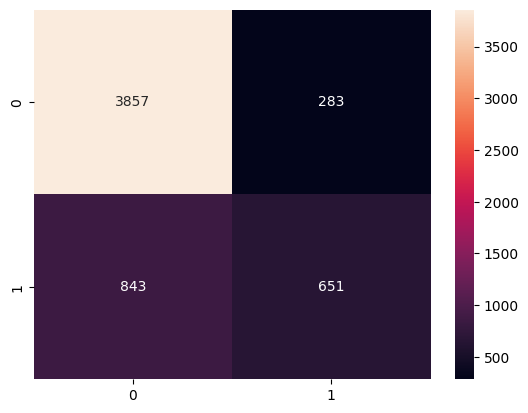

In [47]:
sns.heatmap(CM,annot=True,fmt='d')